# **Visão geral**
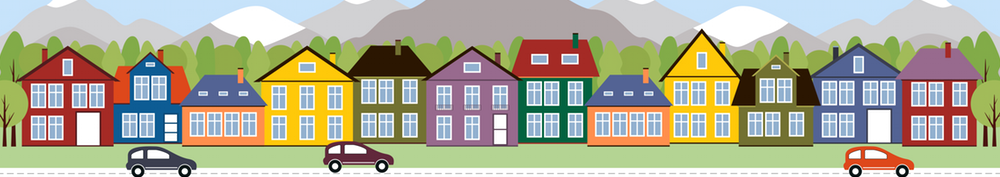

Peça a um comprador de imóveis para descrever a casa dos seus sonhos, e ele provavelmente não começará pela altura do teto do porão ou pela proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados desta competição de playgrounds prova que muito mais influencia as negociações de preço do que o número de quartos ou uma cerca branca.

Com 79 variáveis ​​explicativas descrevendo (quase) todos os aspectos dos imóveis residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

## **Avaliação**

**Meta**

Sua função é prever o preço de venda de cada casa. Para cada ID no conjunto de teste, você deve prever o valor da variável SalePrice.

**Métrica**

As propostas são avaliadas com base na Raiz do Erro Quadrático Médio (RMSE),  entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (A utilização de logaritmos significa que erros na previsão de casas caras e baratas afetarão o resultado igualmente.)





## **Campos de dados**

**SalePrice** - preço de venda do imóvel em dólares. Esta é a variável alvo que você está tentando prever.

**MSSubClass**: Classe do imóvel

**MSZoning**: Classificação geral de zoneamento

**LotFrontage**: Metros lineares de rua conectados à propriedade

**LotArea**: Tamanho do lote em pés quadrados

**Street**: Tipo de acesso à rua

**Alley**: Tipo de acesso a viela

**LotShape**: Formato geral da propriedade

**LandContour**: Plano da propriedade

**Utilities**: Tipo de utilidades disponíveis

**LotConfig**: Configuração do lote

**LandSlope**: Inclinação da propriedade

**Neighborhood**: Localizações físicas dentro dos limites da cidade de Ames

**Condition1**: Proximidade a estrada principal ou ferrovia

**Condition2**: Proximidade a estrada principal ou ferrovia (se uma segunda estiver presente)

**BldgType**: Tipo de moradia

**HouseStyle**: Estilo da moradia

**OverallQual**: Qualidade geral do material e acabamento

**OverallCond**: Classificação geral da condição

**YearBuilt**: Data original de construção

**YearRemodAdd**: Data da reforma

**RoofStyle**: Tipo de telhado

**RoofMatl**: Material do telhado

**Exterior1st**: Revestimento externo da casa

**Exterior2nd**: Revestimento externo da casa (se houver mais de um material)

**MasVnrType**: Tipo de revestimento de alvenaria

**MasVnrArea**: Área do revestimento de alvenaria em pés quadrados

**ExterQual**: Qualidade do material externo

**ExterCond**: Condição atual do material externo

**Foundation**: Tipo de fundação

**BsmtQual**: Altura do porão

**BsmtCond**: Condição geral do porão

**BsmtExposure**: Paredes do porão ao nível do jardim ou com saída para o exterior

**BsmtFinType1**: Qualidade da área acabada do porão

**BsmtFinSF1**: Pés quadrados da área acabada tipo 1

**BsmtFinType2**: Qualidade da segunda área acabada (se presente)

**BsmtFinSF2**: Pés quadrados da área acabada tipo 2

**BsmtUnfSF**: Pés quadrados não acabados da área do porão

**TotalBsmtSF**: Total de pés quadrados da área do porão

**Heating**: Tipo de aquecimento

**HeatingQC**: Qualidade e condição do aquecimento

**CentralAir**: Ar condicionado central

**Electrical**: Sistema elétrico

**1stFlrSF**: Pés quadrados do primeiro andar

**2ndFlrSF**: Pés quadrados do segundo andar

**LowQualFinSF**: Pés quadrados acabados de baixa qualidade (todos os andares)

**GrLivArea**: Pés quadrados da área de estar acima do nível do solo

**BsmtFullBath**: Banheiros completos no porão

**BsmtHalfBath**: Meios banheiros no porão

**FullBath**: Banheiros completos acima do nível do solo

**HalfBath**: Meios banheiros acima do nível do solo

**Bedroom**: Número de quartos acima do nível do porão

**Kitchen**: Número de cozinhas

**KitchenQual**: Qualidade da cozinha

**TotRmsAbvGrd**: Total de cômodos acima do nível do solo (não inclui banheiros)

**Functional**: Classificação da funcionalidade da casa

**Fireplaces**: Número de lareiras

**FireplaceQu**: Qualidade da lareira

**GarageType**: Localização da garagem

**GarageYrBlt**: Ano em que a garagem foi construída

**GarageFinish**: Acabamento interior da garagem

**GarageCars**: Tamanho da garagem em capacidade de carros

**GarageArea**: Tamanho da garagem em pés quadrados

**GarageQual**: Qualidade da garagem

**GarageCond**: Condição da garagem

**PavedDrive**: Entrada pavimentada

**WoodDeckSF**: Área do deck de madeira em pés quadrados

**OpenPorchSF**: Área da varanda aberta em pés quadrados

**EnclosedPorch**: Área da varanda fechada em pés quadrados

**3SsnPorch**: Área da varanda de três estações em pés quadrados

**ScreenPorch**: Área da varanda com tela em pés quadrados

**PoolArea**: Área da piscina em pés quadrados

**PoolQC**: Qualidade da piscina

**Fence**: Qualidade da cerca

**MiscFeature**: Característica diversa não coberta em outras categorias

**MiscVal**: Valor em dólares da característica diversa

**MoSold**: Mês de venda

**YrSold**: Ano de venda

**SaleType**: Tipo de venda

**SaleCondition**: Condição de venda


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# **Análise Exploratória de Dados**

## **Carregar os dados**

In [201]:
train = pd.read_csv('dados/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [202]:
test = pd.read_csv('dados/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## **Informações gerais**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## **Visualizações**

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Visualização da distribuição dos preços de venda das casas

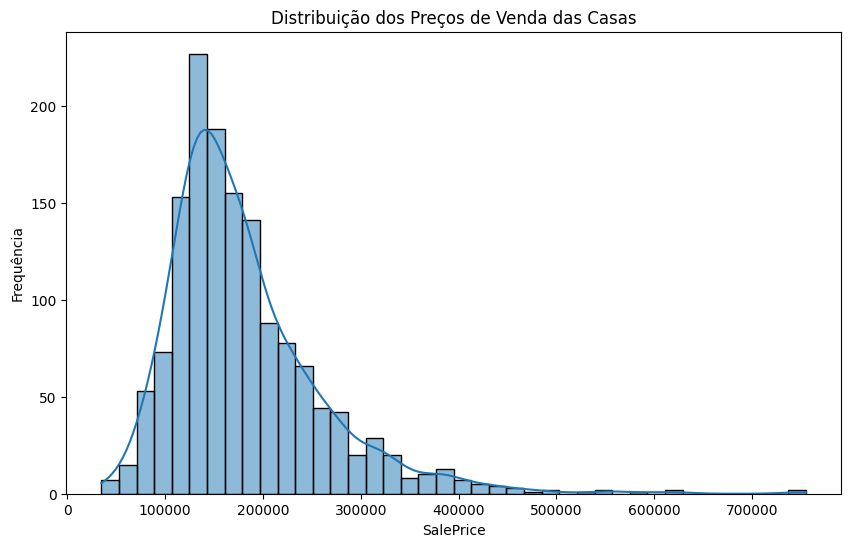

In [205]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True, bins=40)
plt.title('Distribuição dos Preços de Venda das Casas')
plt.xlabel('SalePrice')
plt.ylabel('Frequência')
plt.show()

Relação entre área de estar acima do solo e preço de venda

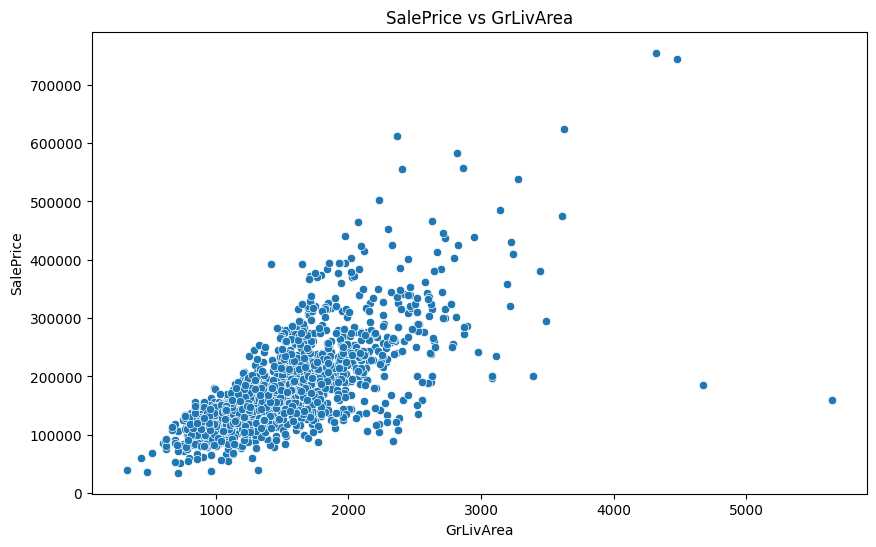

In [206]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

Heatmap de correlação das principais variáveis numéricas

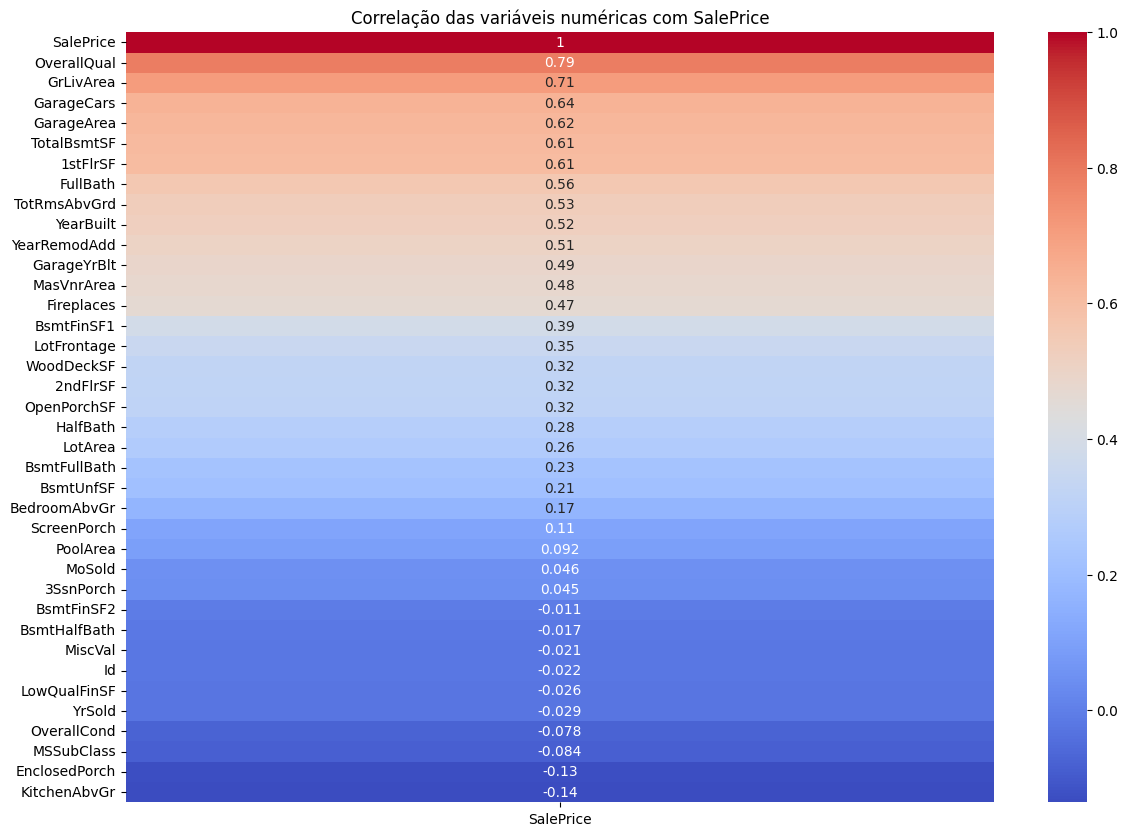

In [207]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das variáveis numéricas com SalePrice')
plt.show()

# **Pré-processamento dos Dados**

## **Tratamento de valores ausentes**

Alley - MasVnrType - FireplaceQu - PoolQC - Fence - MiscFeature - BsmtFinSF2 - BsmtFullBath - BsmtHalfBath

In [19]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [20]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Tratando 'LotFrontage' da base de train e test

In [21]:
print(train.LotFrontage.isnull().sum())
print(test.LotFrontage.isnull().sum())

259
227


In [22]:
train.LotFrontage.fillna(train.LotFrontage.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\3651811643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.LotFrontage.fillna(train.LotFrontage.median(), inplace=True)


In [23]:
test.LotFrontage.fillna(test.LotFrontage.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\372840264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.LotFrontage.fillna(test.LotFrontage.median(), inplace=True)


In [24]:
print(train.LotFrontage.isnull().sum())
print(test.LotFrontage.isnull().sum())

0
0


Tratando 'MSZoning' da base de test

In [25]:
test.MSZoning.isnull().sum()

np.int64(4)

In [26]:
test.MSZoning.value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [27]:
test.MSZoning.mode()

0    RL
Name: MSZoning, dtype: object

In [28]:
test.MSZoning.fillna(('RL'), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\3025926672.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.MSZoning.fillna(('RL'), inplace=True)


In [29]:
test.MSZoning.isnull().sum()

np.int64(0)

Tratando 'MasVnrArea' da base de train e test

In [30]:
train.MasVnrArea.head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

In [31]:
print(train.MasVnrArea.isnull().sum())
print(test.MasVnrArea.isnull().sum())

8
15


In [32]:
train.MasVnrArea.fillna(train.MasVnrArea.mean(), inplace=True)
test.MasVnrArea.fillna(test.MasVnrArea.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\1455663561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.MasVnrArea.fillna(train.MasVnrArea.mean(), inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\1455663561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [33]:
print(train.MasVnrArea.isnull().sum())
print(test.MasVnrArea.isnull().sum())

0
0


Tratando 'BsmtQual' da base de train e test

In [34]:
train.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [35]:
train.BsmtQual.mode()

0    TA
Name: BsmtQual, dtype: object

In [36]:
print(train.BsmtQual.isnull().sum())
print(test.BsmtQual.isnull().sum())

37
44


In [37]:
train.BsmtQual.fillna('TA', inplace=True)
test.BsmtQual.fillna('TA', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2526733853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.BsmtQual.fillna('TA', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2526733853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [38]:
print(train.BsmtQual.isnull().sum())
print(test.BsmtQual.isnull().sum())

0
0


Tratando 'BsmtCond' da base de train e test

In [39]:
train.BsmtCond.value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [40]:
train.BsmtCond.mode()

0    TA
Name: BsmtCond, dtype: object

In [41]:
print(train.BsmtCond.isnull().sum())
print(test.BsmtCond.isnull().sum())

37
45


In [42]:
train.BsmtCond.fillna('TA', inplace=True)
test.BsmtCond.fillna('TA', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\736765594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.BsmtCond.fillna('TA', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\736765594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [43]:
print(train.BsmtCond.isnull().sum())
print(test.BsmtCond.isnull().sum())

0
0


Tratando 'BsmtExposure' da base de train e test

In [44]:
train.BsmtExposure.head()

0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object

In [45]:
train.BsmtExposure.mode()

0    No
Name: BsmtExposure, dtype: object

In [46]:
print(train.BsmtExposure.isnull().sum())
print(test.BsmtExposure.isnull().sum())

38
44


In [47]:
train.BsmtExposure.fillna('No', inplace=True)
test.BsmtExposure.fillna('No', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2726580494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.BsmtExposure.fillna('No', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2726580494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [48]:
print(train.BsmtExposure.isnull().sum())
print(test.BsmtExposure.isnull().sum())

0
0


Tratando 'BsmtFinType1' da base de train e test

In [49]:
train.BsmtFinType1.head()

0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object

In [50]:
train.BsmtFinType1.mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [51]:
print(train.BsmtFinType1.isnull().sum())
print(test.BsmtFinType1.isnull().sum())

37
42


In [52]:
train.BsmtFinType1.fillna('Unf', inplace=True)
test.BsmtFinType1.fillna('Unf', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\1678455226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.BsmtFinType1.fillna('Unf', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\1678455226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [53]:
print(train.BsmtFinType1.isnull().sum())
print(test.BsmtFinType1.isnull().sum())

0
0


Tratando 'BsmtFinType2' da base de train e test

In [54]:
train.BsmtFinType2.head()

0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: BsmtFinType2, dtype: object

In [55]:
train.BsmtFinType2.mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [56]:
print(train.BsmtFinType2.isnull().sum())
print(test.BsmtFinType2.isnull().sum())

38
42


In [57]:
train.BsmtFinType2.fillna('Unf', inplace=True)
test.BsmtFinType2.fillna('Unf', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\4150213176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.BsmtFinType2.fillna('Unf', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\4150213176.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [58]:
print(train.BsmtFinType2.isnull().sum())
print(test.BsmtFinType2.isnull().sum())

0
0


Tratando 'Electrical' da base de train

In [59]:
train.Electrical.head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [60]:
train.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [61]:
print(train.Electrical.isnull().sum())

1


In [62]:
train.Electrical.fillna('Unf', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2765579290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Electrical.fillna('Unf', inplace=True)


In [63]:
print(train.Electrical.isnull().sum())

0


Tratando 'GarageType' da base de train e test

In [64]:
train.GarageType.head()

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

In [65]:
train.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [66]:
print(train.GarageType.isnull().sum())
print(train.GarageType.isnull().sum())

81
81


In [67]:
train.GarageType.fillna('Unf', inplace=True)
test.GarageType.fillna('Unf', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2308107581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.GarageType.fillna('Unf', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2308107581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [68]:
print(train.GarageType.isnull().sum())
print(train.GarageType.isnull().sum())

0
0


Tratando 'GarageYrBlt' da base de train e test

In [69]:
train.GarageYrBlt.head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [70]:
train.GarageYrBlt.median()

np.float64(1980.0)

In [71]:
print(train.GarageYrBlt.isnull().sum())
print(train.GarageYrBlt.isnull().sum())

81
81


In [72]:
train.GarageYrBlt.fillna('Unf', inplace=True)
test.GarageYrBlt.fillna('Unf', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2724431206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.GarageYrBlt.fillna('Unf', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2724431206.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unf' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.GarageYrBlt.fillna('Unf', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipy

In [73]:
print(train.GarageYrBlt.isnull().sum())
print(train.GarageYrBlt.isnull().sum())

0
0


Tratando 'GarageFinish' da base de train e test

In [74]:
train.GarageFinish.head()

0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object

In [75]:
train.GarageFinish.mode()

0    Unf
Name: GarageFinish, dtype: object

In [76]:
print(train.GarageFinish.isnull().sum())
print(train.GarageFinish.isnull().sum())

81
81


In [77]:
train.GarageFinish.fillna('Unf', inplace=True)
test.GarageFinish.fillna('Unf', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2892491441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.GarageFinish.fillna('Unf', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2892491441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [78]:
print(train.GarageFinish.isnull().sum())
print(train.GarageFinish.isnull().sum())

0
0


Tratando 'GarageQual' da base de train e test

In [79]:
train.GarageQual.head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageQual, dtype: object

In [80]:
train.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

In [81]:
print(train.GarageQual.isnull().sum())
print(train.GarageQual.isnull().sum())

81
81


In [82]:
train.GarageQual.fillna('TA', inplace=True)
test.GarageQual.fillna('TA', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\293543571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.GarageQual.fillna('TA', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\293543571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [83]:
print(train.GarageQual.isnull().sum())
print(train.GarageQual.isnull().sum())

0
0


Tratando 'GarageCond' da base de train e test  

In [84]:
train.GarageCond.head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageCond, dtype: object

In [85]:
train.GarageCond.mode()

0    TA
Name: GarageCond, dtype: object

In [86]:
print(train.GarageCond.isnull().sum())
print(train.GarageCond.isnull().sum())

81
81


In [87]:
train.GarageCond.fillna('TA', inplace=True)
test.GarageCond.fillna('TA', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\118342013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.GarageCond.fillna('TA', inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\118342013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [88]:
print(train.GarageCond.isnull().sum())
print(test.GarageCond.isnull().sum())

0
0


Tratando 'Utilities' da base de test   

In [89]:
train.Utilities.head()

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: Utilities, dtype: object

In [90]:
train.Utilities.mode()

0    AllPub
Name: Utilities, dtype: object

In [91]:
print(test.Utilities.isnull().sum())

2


In [92]:
test.Utilities.fillna('AllPub', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\1553658634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Utilities.fillna('AllPub', inplace=True)


In [93]:
print(test.Utilities.isnull().sum())

0


Tratando 'Exterior1st' da base de test    

In [94]:
train.Exterior1st.head()

0    VinylSd
1    MetalSd
2    VinylSd
3    Wd Sdng
4    VinylSd
Name: Exterior1st, dtype: object

In [95]:
train.Exterior1st.mode()

0    VinylSd
Name: Exterior1st, dtype: object

In [96]:
print(test.Exterior1st.isnull().sum())

1


In [97]:
test.Exterior1st.fillna('VinylSd', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2977761483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Exterior1st.fillna('VinylSd', inplace=True)


In [98]:
print(test.Exterior1st.isnull().sum())

0


Tratando 'Exterior2nd' da base de test     

In [99]:
train.Exterior2nd.head()

0    VinylSd
1    MetalSd
2    VinylSd
3    Wd Shng
4    VinylSd
Name: Exterior2nd, dtype: object

In [100]:
train.Exterior2nd.mode()

0    VinylSd
Name: Exterior2nd, dtype: object

In [101]:
print(test.Exterior2nd.isnull().sum())

1


In [102]:
test.Exterior2nd.fillna('VinylSd', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2699375990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Exterior2nd.fillna('VinylSd', inplace=True)


In [103]:
print(test.Exterior2nd.isnull().sum())

0


Tratando 'BsmtFinSF1' da base de test      

In [104]:
test.BsmtFinSF1.head()

0    468.0
1    923.0
2    791.0
3    602.0
4    263.0
Name: BsmtFinSF1, dtype: float64

In [105]:
test.BsmtFinSF1.median()

np.float64(350.5)

In [106]:
print(test.BsmtFinSF1.isnull().sum())

1


In [107]:
test.BsmtFinSF1.fillna(test.BsmtFinSF1.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\1982300129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.BsmtFinSF1.fillna(test.BsmtFinSF1.median(), inplace=True)


In [108]:
print(test.BsmtFinSF1.isnull().sum())

0


Tratando 'BsmtFinSF2' da base de test        

In [109]:
test.BsmtFinSF2.head()

0    144.0
1      0.0
2      0.0
3      0.0
4      0.0
Name: BsmtFinSF2, dtype: float64

In [110]:
test.BsmtFinSF2.median()

np.float64(0.0)

In [111]:
print(test.BsmtFinSF2.isnull().sum())

1


In [112]:
test.BsmtFinSF2.fillna(test.BsmtFinSF2.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\4048840204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.BsmtFinSF2.fillna(test.BsmtFinSF2.median(), inplace=True)


In [113]:
print(test.BsmtFinSF2.isnull().sum())

0


Tratando 'BsmtUnfSF' da base de test         

In [114]:
test.BsmtUnfSF.head()

0     270.0
1     406.0
2     137.0
3     324.0
4    1017.0
Name: BsmtUnfSF, dtype: float64

In [115]:
test.BsmtUnfSF.median()

np.float64(460.0)

In [116]:
print(test.BsmtUnfSF.isnull().sum())

1


In [117]:
test.BsmtUnfSF.fillna(test.BsmtUnfSF.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\3481792112.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.BsmtUnfSF.fillna(test.BsmtUnfSF.median(), inplace=True)


In [118]:
print(test.BsmtUnfSF.isnull().sum())

0


Tratando 'TotalBsmtSF' da base de test

In [119]:
test.TotalBsmtSF.head()

0     882.0
1    1329.0
2     928.0
3     926.0
4    1280.0
Name: TotalBsmtSF, dtype: float64

In [120]:
test.TotalBsmtSF.median()

np.float64(988.0)

In [121]:
print(test.TotalBsmtSF.isnull().sum())

1


In [122]:
test.TotalBsmtSF.fillna(test.TotalBsmtSF.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\2709238925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.TotalBsmtSF.fillna(test.TotalBsmtSF.median(), inplace=True)


In [123]:
print(test.TotalBsmtSF.isnull().sum())

0


Tratando 'Functional' da base de test  

In [124]:
test.Functional.head()

0    Typ
1    Typ
2    Typ
3    Typ
4    Typ
Name: Functional, dtype: object

In [125]:
test.Functional.mode()

0    Typ
Name: Functional, dtype: object

In [126]:
print(test.Functional.isnull().sum())

2


In [127]:
test.Functional.fillna('Typ', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\1211092344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Functional.fillna('Typ', inplace=True)


In [128]:
print(test.TotalBsmtSF.isnull().sum())

0


Tratando 'GarageCars' da base de test   

In [129]:
test.GarageCars.head()

0    1.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: GarageCars, dtype: float64

In [130]:
test.GarageCars.median()

np.float64(2.0)

In [131]:
print(test.GarageCars.isnull().sum())

1


In [132]:
test.GarageCars.fillna(test.GarageCars.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\3831139023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.GarageCars.fillna(test.GarageCars.median(), inplace=True)


In [133]:
print(test.GarageCars.isnull().sum())

0


Tratando 'GarageArea' da base de test    

In [134]:
test.GarageArea.head()

0    730.0
1    312.0
2    482.0
3    470.0
4    506.0
Name: GarageArea, dtype: float64

In [135]:
test.GarageArea.median()

np.float64(480.0)

In [136]:
print(test.GarageArea.isnull().sum())

1


In [137]:
test.GarageArea.fillna(test.GarageArea.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\3089199467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.GarageArea.fillna(test.GarageArea.median(), inplace=True)


In [138]:
print(test.GarageArea.isnull().sum())

0


Tratando 'SaleType' da base de test    

In [139]:
test.SaleType.head()

0    WD
1    WD
2    WD
3    WD
4    WD
Name: SaleType, dtype: object

In [140]:
test.SaleType.mode()

0    WD
Name: SaleType, dtype: object

In [141]:
print(test.SaleType.isnull().sum())

1


In [142]:
test.SaleType.fillna('WD', inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_7668\3522457678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.SaleType.fillna('WD', inplace=True)


In [143]:
print(test.SaleType.isnull().sum())

0


## **Engenharia de Features**

In [144]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Agrupando as variáveis 'Condition1', 'Condition2'

In [145]:
Condition = pd.DataFrame({'Condition1': train.Condition1,
                          'Condition2': train.Condition2})
Condition.head()

,Condition1,Condition2
0,Norm,Norm
1,Feedr,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm


In [146]:
train['Condition'] = train['Condition1'] + ' ' +  train['Condition2']
test['Condition'] = test['Condition1'] + ' ' +  test['Condition2']

In [147]:
train['Condition'].head()

0     Norm Norm
1    Feedr Norm
2     Norm Norm
3     Norm Norm
4     Norm Norm
Name: Condition, dtype: object

## **Excluindo váriveis**

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'Condition1', 'Condition2']

In [148]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [149]:
train.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'Condition1', 'Condition2'], axis=1, inplace=True)

In [150]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Y

In [151]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [152]:
test.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'Condition1', 'Condition2'], axis=1, inplace=True)

In [153]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Y

In [154]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish

## **Codificação de variáveis categóricas**

In [155]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Condition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,Norm Norm
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,Feedr Norm
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,Norm Norm
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,Norm Norm
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,Norm Norm


In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [157]:
categoricas_train = train.select_dtypes(include=['category', 'object'])
categoricas_train.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition', 'Condition'],
      dtype='object')

In [ ]:
def aplicar_label_encoding(train_df, test_df, colunas_categoricas):
    encoders = {}
    train_df_encoded = train_df.copy()
    test_df_encoded = test_df.copy()

    for coluna in colunas_categoricas:
        if coluna in train_df_encoded.columns and coluna in test_df_encoded.columns:
            # Inicializa um LabelEncoder para cada coluna
            encoders[coluna] = LabelEncoder()

            # Ajusta o encoder com os valores únicos de ambas as bases para garantir consistência
            valores_combinados = pd.concat([train_df_encoded[coluna], test_df_encoded[coluna]]).astype(str).unique()
            encoders[coluna].fit(valores_combinados)

            # Transforma as colunas em ambas as bases
            train_df_encoded[coluna + '_encoded'] = encoders[coluna].transform(train_df_encoded[coluna].astype(str))
            test_df_encoded[coluna + '_encoded'] = encoders[coluna].transform(test_df_encoded[coluna].astype(str))

            # Opcional: Remover a coluna original após a codificação
            # train_df_encoded = train_df_encoded.drop(coluna, axis=1)
            # test_df_encoded = test_df_encoded.drop(coluna, axis=1)
        else:
            print(f"A coluna '{coluna}' não existe em ambas as bases. Pulando.")

    return train_df_encoded, test_df_encoded

# Supondo que você já carregou seus DataFrames 'train' e 'test'
# Exemplo de como carregar os DataFrames (substitua pelos seus caminhos de arquivo):
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

colunas_para_codificar = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                           'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
                           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
                           'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                           'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
                           'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                           'SaleCondition', 'Condition']



In [ ]:
# Aplicando a função de Label Encoding
train_encoded, test_encoded = aplicar_label_encoding(train, test, colunas_para_codificar)

# Exibindo as primeiras linhas dos DataFrames codificados
print("Primeiras linhas do DataFrame de treino codificado:")
print(train_encoded.head())
print("\nPrimeiras linhas do DataFrame de teste codificado:")
print(test_encoded.head())

Primeiras linhas do DataFrame de treino codificado:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... Functional_encoded GarageType_encoded  \
0    AllPub    Inside  ...                  6                  1   
1    AllPub       FR2  ...                  6                  1   
2    AllPub    Inside  ...                  6                  1   
3    AllPub    Corner  ...                  6                  5   
4    AllPub       FR2  ...                  6                  1   

  GarageYrBlt_encoded GarageFinish_encoded  GarageQual_enc

In [160]:
train_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Functional_encoded,GarageType_encoded,GarageYrBlt_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,Condition_encoded
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,6,1,94,1,4,4,2,8,4,9
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,6,1,67,1,4,4,2,8,4,5
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,6,1,92,1,4,4,2,8,4,9
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,6,5,89,2,4,4,2,8,0,9
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,6,1,91,1,4,4,2,8,4,9


In [161]:
test_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Functional_encoded,GarageType_encoded,GarageYrBlt_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,Condition_encoded
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,6,1,52,2,4,4,2,8,4,5
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,6,1,49,2,4,4,2,8,4,9
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,6,1,88,0,4,4,2,8,4,9
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,6,1,89,0,4,4,2,8,4,9
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,6,1,83,1,4,4,2,8,4,9


In [162]:
train_encoded.isnull().sum()

Id                       0
MSSubClass               0
MSZoning                 0
LotFrontage              0
LotArea                  0
Street                   0
LotShape                 0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Neighborhood             0
BldgType                 0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrArea               0
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtUnfSF                0
TotalBsmtSF              0
Heating                  0
HeatingQC                0
CentralAir               0
E

In [163]:
train_encoded.drop(columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                           'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
                           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
                           'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                           'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
                           'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                           'SaleCondition', 'Condition'], axis=1, inplace=True)

In [164]:
test_encoded.drop(columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                           'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
                           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
                           'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                           'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
                           'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                           'SaleCondition', 'Condition'], axis=1, inplace=True)

In [165]:
train = train_encoded

In [166]:
test = test_encoded

In [167]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Functional_encoded,GarageType_encoded,GarageYrBlt_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,Condition_encoded
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,6,1,94,1,4,4,2,8,4,9
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,6,1,67,1,4,4,2,8,4,5
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,6,1,92,1,4,4,2,8,4,9
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,6,5,89,2,4,4,2,8,0,9
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,6,1,91,1,4,4,2,8,4,9


In [168]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Functional_encoded,GarageType_encoded,GarageYrBlt_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,Condition_encoded
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,6,1,52,2,4,4,2,8,4,5
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,6,1,49,2,4,4,2,8,4,9
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,6,1,88,0,4,4,2,8,4,9
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,6,1,89,0,4,4,2,8,4,9
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,6,1,83,1,4,4,2,8,4,9


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1460 non-null   int64  
 1   MSSubClass             1460 non-null   int64  
 2   LotFrontage            1460 non-null   float64
 3   LotArea                1460 non-null   int64  
 4   OverallQual            1460 non-null   int64  
 5   OverallCond            1460 non-null   int64  
 6   YearBuilt              1460 non-null   int64  
 7   YearRemodAdd           1460 non-null   int64  
 8   MasVnrArea             1460 non-null   float64
 9   BsmtFinSF1             1460 non-null   int64  
 10  BsmtUnfSF              1460 non-null   int64  
 11  TotalBsmtSF            1460 non-null   int64  
 12  1stFlrSF               1460 non-null   int64  
 13  2ndFlrSF               1460 non-null   int64  
 14  LowQualFinSF           1460 non-null   int64  
 15  GrLi

In [171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1459 non-null   int64  
 1   MSSubClass             1459 non-null   int64  
 2   LotFrontage            1459 non-null   float64
 3   LotArea                1459 non-null   int64  
 4   OverallQual            1459 non-null   int64  
 5   OverallCond            1459 non-null   int64  
 6   YearBuilt              1459 non-null   int64  
 7   YearRemodAdd           1459 non-null   int64  
 8   MasVnrArea             1459 non-null   float64
 9   BsmtFinSF1             1459 non-null   float64
 10  BsmtUnfSF              1459 non-null   float64
 11  TotalBsmtSF            1459 non-null   float64
 12  1stFlrSF               1459 non-null   int64  
 13  2ndFlrSF               1459 non-null   int64  
 14  LowQualFinSF           1459 non-null   int64  
 15  GrLi

# **Modelagem**

## **Dividir os dados de treinamento**

In [173]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_encoded',
       'Street_encoded', 'LotShape_encoded', 'LandContour_encoded',
       'Utilities_encoded', 'LotConfig_encoded', 'LandSlope_encoded',
       'Neighborhood_encoded', 'BldgType_encoded', 'HouseStyle_encoded',
       'RoofStyle_encoded', 'RoofMatl_encoded', 'Exterior1st_encoded',
       'Exterior2nd_encoded', 'ExterQual_encoded', 'ExterCond_encoded',
       'Foundation_encoded', 'BsmtQual_encoded', 'BsmtCond_encoded',
       'BsmtExposure_encoded', 'BsmtFinType1_encod

In [174]:
X = train.drop(columns='SalePrice', axis= 1)
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning_encoded', 'Street_encoded',
       'LotShape_encoded', 'LandContour_encoded', 'Utilities_encoded',
       'LotConfig_encoded', 'LandSlope_encoded', 'Neighborhood_encoded',
       'BldgType_encoded', 'HouseStyle_encoded', 'RoofStyle_encoded',
       'RoofMatl_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded',
       'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded',
       'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded',
       'BsmtFinType1_encoded', 'BsmtFin

In [175]:
X.shape

(1460, 70)

In [176]:
y = train['SalePrice']
y.head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [177]:
y.shape

(1460,)

## **Divisão dos Dados**

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.8 )

In [ ]:
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')
print(f'Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}')

# **Modelo**

Random Forest

In [183]:
model = RandomForestClassifier()

In [184]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [185]:
y_predict = model.predict(X_test)
y_predict

array([132500, 268000, 105000, ..., 325300, 140000, 115000], shape=(1168,))

## **Avaliar o modelo**

In [186]:
accuracy_score_result = accuracy_score(y_pred=y_predict, y_true=y_test)
confusion_matrix = confusion_matrix(y_pred=y_predict, y_true=y_test)
classification_report = classification_report(y_pred= y_predict, y_true=y_test)

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [187]:
print(f"Acurácia: {accuracy_score_result}")
print(f"Matriz de Confusão:\n{confusion_matrix}")
print(f"Relatório de Classificação:\n{classification_report}")

Acurácia: 0.009417808219178082
Matriz de Confusão:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Relatório de Classificação:
              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         1
       35311       0.00      0.00      0.00         1
       37900       0.00      0.00      0.00         1
       39300       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         0
       55000       0.00      0.00      0.00         2
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         3
       61000       0.00      0.00      0.00         1
       62383       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00 

## **Ajuste de hiperparâmetros (Hyperparameter Tuning):**

Definir o espaço de busca dos hiperparâmetros

In [188]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],               # número de árvores
    'max_depth': [None, 10, 20, 30, 50],                # profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],                    # mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],                      # mínimo de amostras em uma folha
    'max_features': ['auto', 'sqrt', 'log2'],           # número de features consideradas em cada split
    'bootstrap': [True, False],                         # usar bootstrap ou não
    'criterion': ['gini', 'entropy', 'log_loss'],       # função de qualidade da divisão (log_loss é p/ classificação probabilística)
}


 Criar o objeto GridSearchCV

In [189]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

Executar o Grid Search nos dados de treino

In [190]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3240 candidates, totalling 9720 fits


c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1601 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [191]:
print("Melhores hiperparâmetros: ", grid_search.best_params_)

Melhores hiperparâmetros:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


8. Avaliar o modelo com os melhores hiperparâmetros nos dados de teste

In [192]:
from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nRelatório de Classificação no conjunto de teste:")
print(classification_report(y_test.to_numpy(), y_pred))


Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         1
       35311       0.00      0.00      0.00         1
       37900       0.00      0.00      0.00         1
       39300       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         0
       55000       0.00      0.00      0.00         2
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         3
       61000       0.00      0.00      0.00         1
       62383       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [193]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy_score_result = accuracy_score(y_pred=y_predict, y_true=y_test)
confusion_matrix = confusion_matrix(y_pred=y_predict, y_true=y_test)
classification_report = classification_report(y_pred= y_predict, y_true=y_test)

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [194]:
print(f"Acurácia: {accuracy_score_result}")
print(f"Matriz de Confusão:\n{confusion_matrix}")
print(f"Relatório de Classificação:\n{classification_report}")

Acurácia: 0.009417808219178082
Matriz de Confusão:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Relatório de Classificação:
              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         1
       35311       0.00      0.00      0.00         1
       37900       0.00      0.00      0.00         1
       39300       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         0
       55000       0.00      0.00      0.00         2
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         3
       61000       0.00      0.00      0.00         1
       62383       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00 

# **Previsão e Submissão**

In [195]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Functional_encoded,GarageType_encoded,GarageYrBlt_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded,Condition_encoded
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,6,1,52,2,4,4,2,8,4,5
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,6,1,49,2,4,4,2,8,4,9
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,6,1,88,0,4,4,2,8,4,9
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,6,1,89,0,4,4,2,8,4,9
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,6,1,83,1,4,4,2,8,4,9


## **Fazer previsões**

In [196]:
test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning_encoded', 'Street_encoded',
       'LotShape_encoded', 'LandContour_encoded', 'Utilities_encoded',
       'LotConfig_encoded', 'LandSlope_encoded', 'Neighborhood_encoded',
       'BldgType_encoded', 'HouseStyle_encoded', 'RoofStyle_encoded',
       'RoofMatl_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded',
       'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded',
       'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded',
       'BsmtFinType1_encoded', 'BsmtFin

In [197]:
X_test_predict = test
X_test_predict.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning_encoded', 'Street_encoded',
       'LotShape_encoded', 'LandContour_encoded', 'Utilities_encoded',
       'LotConfig_encoded', 'LandSlope_encoded', 'Neighborhood_encoded',
       'BldgType_encoded', 'HouseStyle_encoded', 'RoofStyle_encoded',
       'RoofMatl_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded',
       'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded',
       'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded',
       'BsmtFinType1_encoded', 'BsmtFin

In [198]:
test.shape

(1459, 70)

In [199]:
predictions_test  = best_model.predict(X_test_predict)
predictions_test

array([147000, 141000, 215000, ..., 160000, 118000, 250000], shape=(1459,))

## **Criar o Arquivo de Submissão:**

In [208]:
test_original = pd.read_csv('dados/test.csv')

 Criar um DataFrame com as colunas 'PassengerId' e 'Survived'

In [ ]:
submission = pd.DataFrame({'Id': test_original.Id, 'SalePrice': predictions_test})
submission.head()

,Id,SalePrice
0,1461,160000
1,1462,141000
2,1463,200000
3,1464,200000
4,1465,181000


 Salvar o DataFrame em um arquivo CSV chamado 'submission.csv'

In [ ]:
submission.to_csv('submission.csv', index=False)

:)